<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Learning_without_Forgetting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learning without Forgetting**

논문 링크: https://arxiv.org/abs/1606.09282v3

본 논문은 CNN을 기준으로 설명을 하는데, 기존의 task에 대해 학습을 한 후 새로운 task에 대해 학습을 하는 방법은 아래와 같이 3가지가 있다.

1. **Feature Extraction**: feature extraction하는 부분을 freeze한 뒤 classifier에 new task를 적용한다.
2. **Fine-tuning**: 기존 model을 새로운 task의 dataset에 대해 완전히 맞춘다. 즉, 기준의 데이터에 대한 성능이 안좋아진다.
3. **Joint Training**: old task와 new task를 모두 합쳐놓은 형태이다. 모든 task를 재학습 해야하기 때문에 매우 비효율적이지만, 성능 자체는 좋다.

## **LwF(Learning without Forgetting)**

본 논문의 저자는 위에서 간략히 소개한 기법들의 한계점들을 개선하고자 **Learning without Forgetting**을 제안한다.

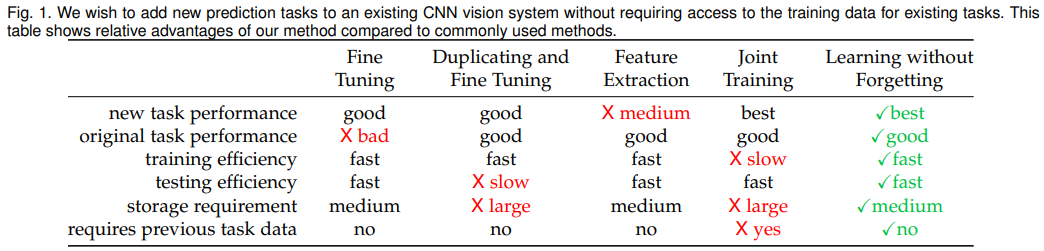

본 논문에서 소개하는 LwF에게 크게 3가지의 장점이 있다고 주장하는데, 첫 번째는 먼저 이전의 task나 새로운 task에 대해 모두 성능이 좋다. 두 번째는 계산 효율성인데 joint training의 경우 모든 task에 대해 좋은 성능을 얻기 위해 새로운 task가 들어올 때마다 다시 모든 task를 재학습 해야하기 때문에 계산면에서 LwF가 훨씬 우세하다. 세 번째는 배포의 단순성인데, task가 한번 학습이 되면 굳이 성능을 유지하기 위해 data를 유지하거나 보관할 필요가 없기 때문에 편하다.

위의 그림 Figure 1을 참고하면서 여러 기법들과 LwF를 좀 더 자세히 비교를 하자면,

**Feature Extraction**의 경우 기존 task에 대해 feature를 추출하게 끔 설계가 되어있기 때문에 새로운 task에 대해 좋은 성능을 보여주는게 쉽지 않다. 반면, LwF는 새로운 task에도 좋은 성능을 보여준다.

**Fine-tuning**의 경우 기존의 task로 학습한 모델을 새로운 task에 대해 학습을 진행하는 것인데, 이는 당연히 학습을 진행될수록 기존의 task에 대한 성능이 안좋아질 수 밖에 없다. 반면, LwF는 새로운 task 뿐만아니라 기존의 task에 대해서도 좋은 성능을 보여준다.

**Multitask learning**은 모든 task에 data가 있어야 한다. 반면, LwF는 새로운 task에 대한 data만 있어도 된다.

**Adding new nodes**는 각 network의 layer에 node를 추가하는 것으로써 새로운 차별적 feature를 학습하면서 원래 network의 parameter를 보존하는 방법이다. 예시로 Deep Block Modular Neural Networks for fully-connected neural networks이나 Progressive Neural Networks for reinforcement learning등이 있다. 이 방식은 기존 network에 node를 추가하는 것이기 때문에 당연히 parameter가 크게 증가한다는 단점이 있으며, parameter가 증가하면 많은 dataset을 요구한다는 점도 큰 한계점이다.

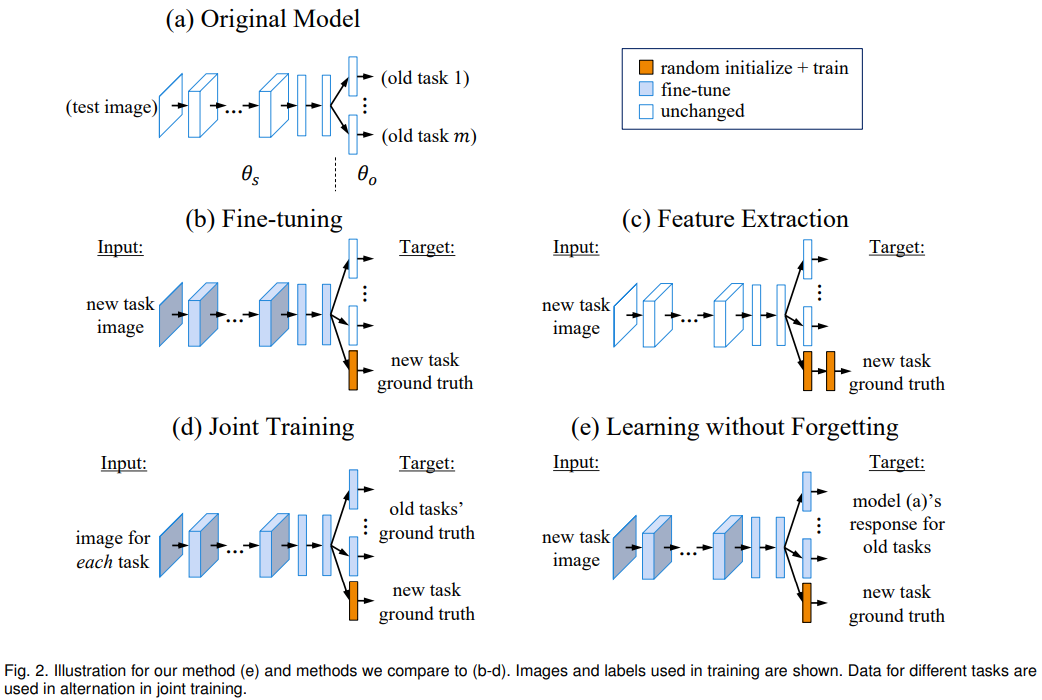

위의 그림 Figure 2는 다른 기법들과 (e) 부분에 본 논문이 소개하는 LwF에 대해 나와있다.

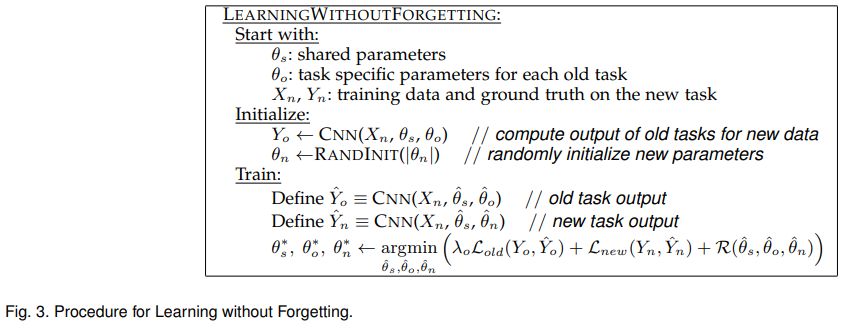

그리고 알고리즘의 경우 위의 그림 Figure 3에 나와있다.

먼저, 이전 task에 대한 출력을 위해 원래 network의 새 task image에 대한 결과를 y_o에 저장한다. 이때, 실헙에는 classification이 포함되므로 결과는 image에 대한 label probabilities의 집합이다. 그리고 새로운 class에 대한 node가 output layer에 추가된다. 새 parameter의 수는 마지막 shared layer의 node를 새 class에 곱한 것과 같다. 따라서 일반적으로 전체 parameter에 비하면 추가되는 parameter는 매우 적은 비율이다.

다음으로 network를 훈련하여 모든 task에 대한 loss를 최소화하고 stochastic gradient descent를 사용해 R를 regularization한다. 이때, regularization R은 0.0005의 단순 weight decay에 해당한다.

train을 진행할 때, 먼저 θ_s와 θ_o를 고정하고 θ_n을 수렴하도록 훈련한다.(= warm-up step) 그리고 수렴할 때까지 θ_s, θ_o 및 θ_n을 공동으로 훈련한다.(= joint-optimize step)

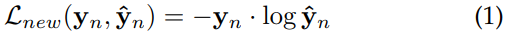

새로운 task에 대한 loss는 위와 같다. 그냥 multi-label classification이므로 일반적인 multinomial logistic loss을 사용한다. y_n은 one-hot GT label 벡터이고, ^y_n은 network의 output이다.

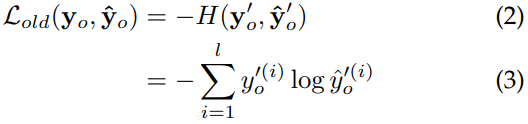

각 원래 task에 대해 각 image의 output이 원래 network에서 기록된 output과 가깝기를 원한다. 따라서 본 논문은 Hinton에 의해 발견된 Knowledge Distillation loss를 사용한다. 이것은 작은 확률에 대한 weight를 증가시키는 수정된 cross-entropy이다. 이때, l은 label 수이다.

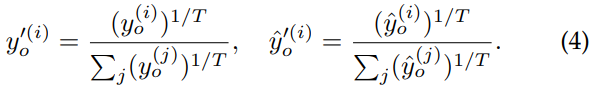

위의 식의 y^(i)_o, ^yˆ(i)_o은 각각 기록된 확률과 현재 확률이다. T값을 1보다 크게 설정하면 더 작은 logit 값의 weight가 증가하고 network가 class간의 유사성을 더 잘 encoding하도록 권장한다. 본 논문에서는 T값을 2로 설정하였다. 위의 그림 Figure 3에서 λ_o 값으로 1을 설정한다.

### **Relationship to joint training**

앞서 언급했듯이 joint training과 LwF의 주요 차이점은 이전의 dataset이 필요없다는 것이다. LwF는 이전 dataset이 아닌 새로운 task의 image인 x_n과 새로운 task로 학습을 하기 전 기록을 직행한 y_o를 대신 사용한다.

덕분에 LwF가 joint training에 비해 계산 비용이나 메모리 비용 등 모든 측면에서 이득을 볼 수 있다.

## **Experiments**

본 논문에서는 모든 실험에 MatConvNet을 사용하여 momentum이 0.9인 stochastic gradient descent를 사용해 훈련시켰다. 추가적으로 fc-layer에 dropout을 적용하였으며, Xavier initialization을 사용했다.

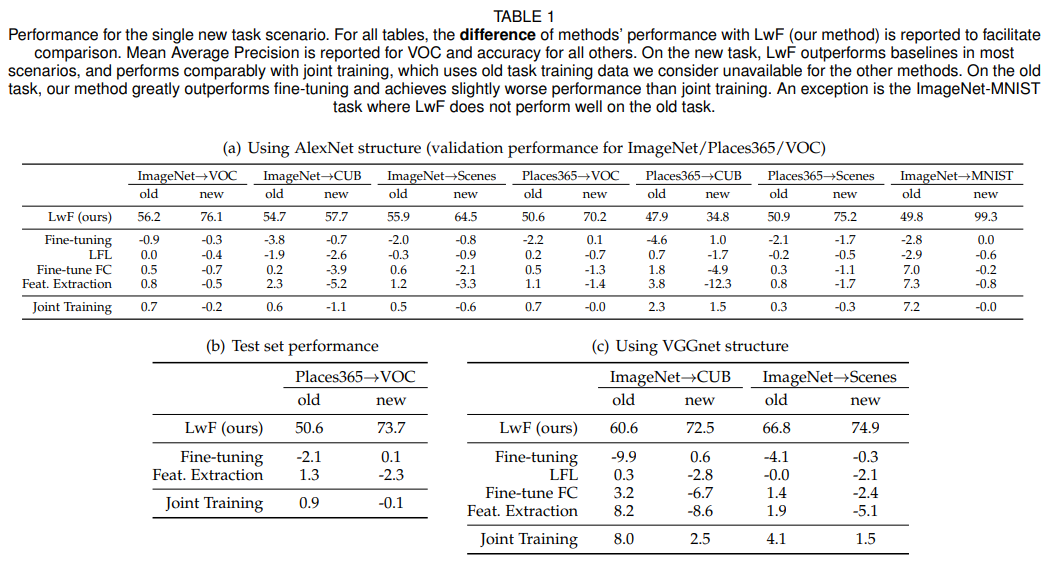

위의 표 Table 1의 (a)와 (b)는 AlexNet을 사용해 LwF와 다른 기법들의 성능을 old task와 new task에 대해 비교한 것이다. 그리고 (c) 부분은 VGGNet을 사용해 비교한 것이다.

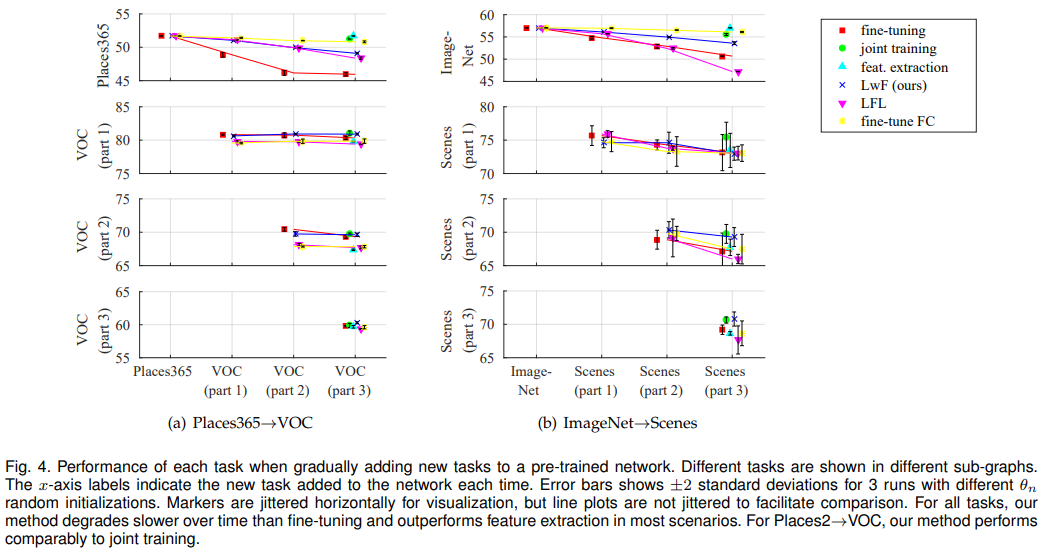

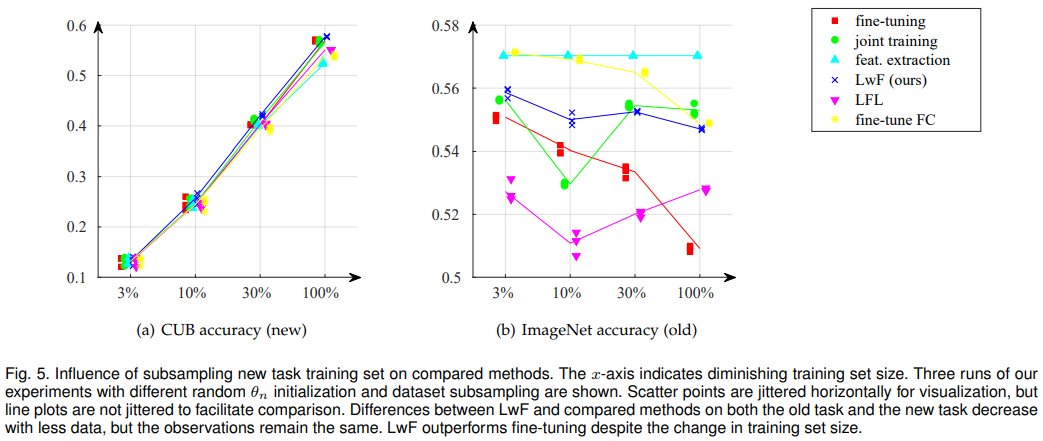

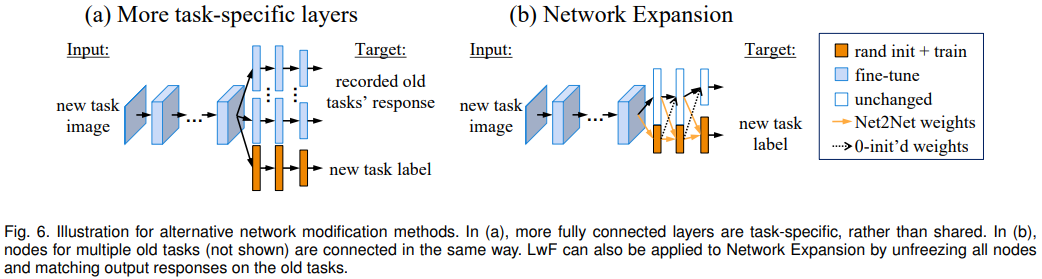

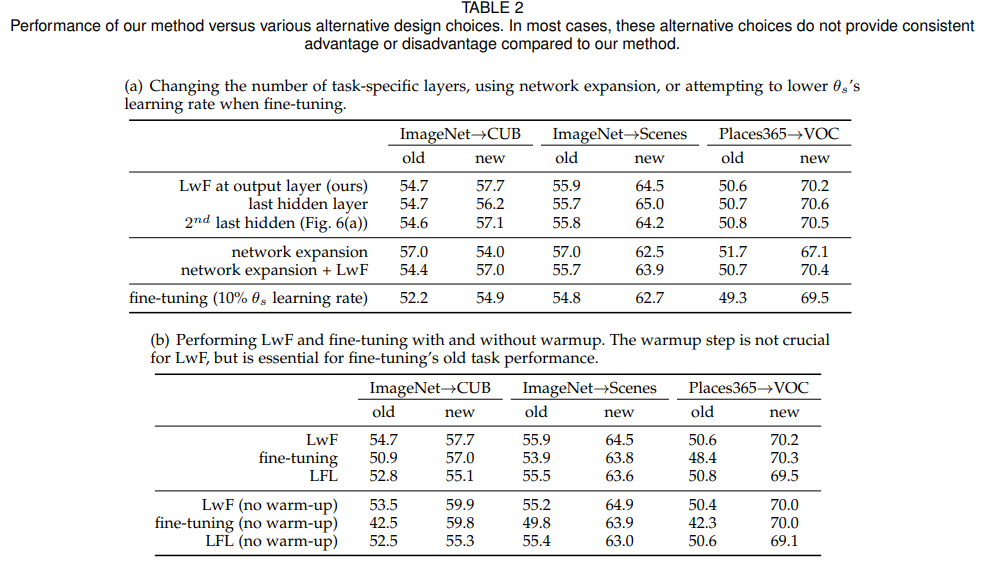

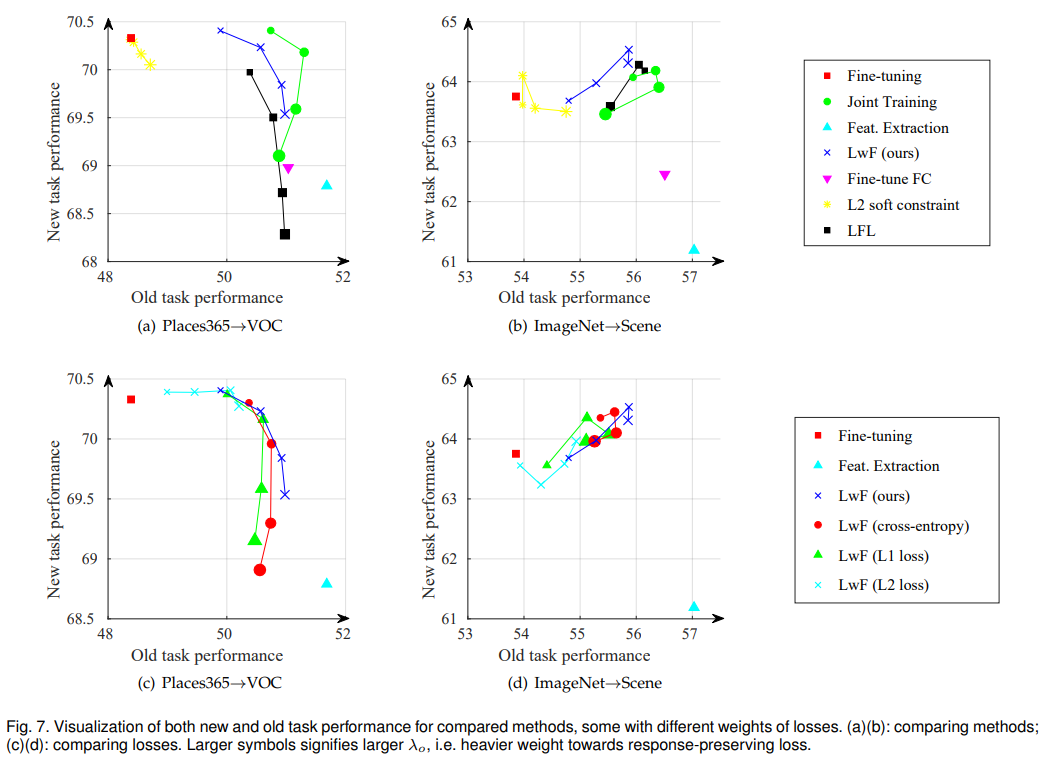